# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [2]:
import pandas as pd

# Load the dataset
file_path = 'Online Retail.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# Data Cleaning
Handle Missing Values: We will drop rows where CustomerID is missing since they are crucial for customer analysis.
Convert Data Types: Ensure InvoiceDate is in datetime format.
Remove Duplicates: Drop any duplicate rows.
Remove Negative Quantities: Since negative quantities don't make sense in the context of sales, we will filter them out.

In [12]:
df = df.dropna(subset=['CustomerID'])


In [13]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [14]:
df = df.drop_duplicates()


In [15]:
df = df[df['Quantity'] > 0]


In [11]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Basic Statistics and Visualization
Basic Statistics: Explore measures of central tendency and dispersion.
Visualize Quantities and Sales: Generate histograms and bar plots.

In [19]:
# Display basic statistics
df.describe()

import matplotlib.pyplot as plt
import seaborn as sns

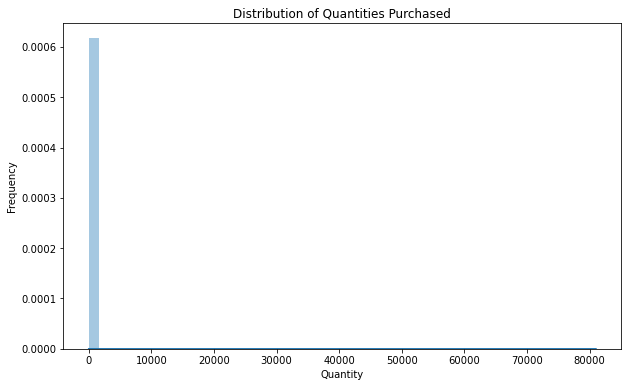

In [23]:
# Distribution of quantities purchased
plt.figure(figsize=(10, 6))
sns.distplot(df['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantities Purchased')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

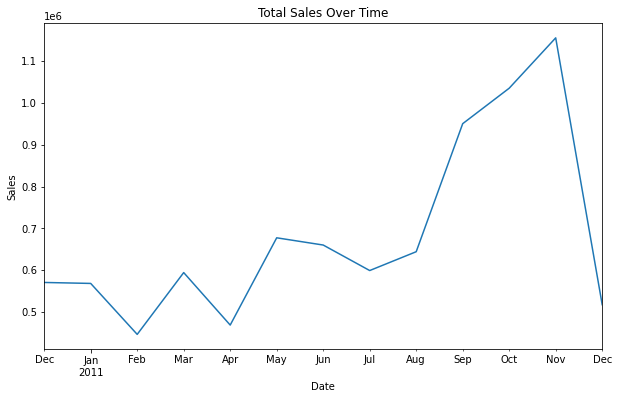

In [21]:
# Total sales over time
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
sales_over_time = df.resample('M', on='InvoiceDate')['TotalPrice'].sum()

plt.figure(figsize=(10, 6))
sales_over_time.plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Sales Trends Analysis
Busiest Sales Months: Identify the busiest sales months.
Busiest Days of the Week: Analyze sales by days of the week.


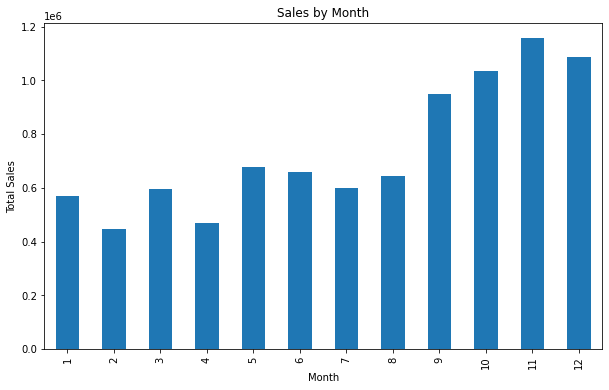

In [24]:
# Busiest sales months
sales_by_month = df.groupby(df['InvoiceDate'].dt.month)['TotalPrice'].sum()
plt.figure(figsize=(10, 6))
sales_by_month.plot(kind='bar')
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

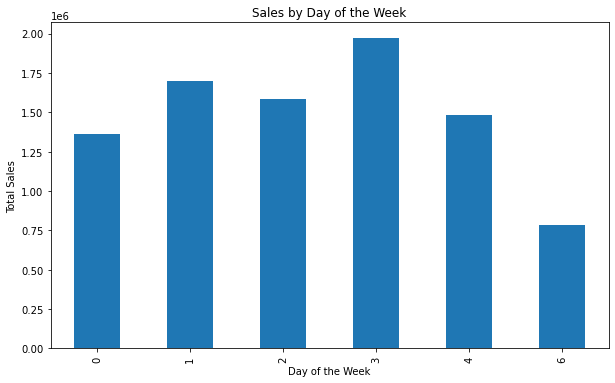

In [25]:
# Busiest days of the week
sales_by_day = df.groupby(df['InvoiceDate'].dt.dayofweek)['TotalPrice'].sum()
plt.figure(figsize=(10, 6))
sales_by_day.plot(kind='bar')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()

# Top-Selling Products and Countries
Top-Selling Products: Identify products with the highest sales quantities.
Top-Selling Countries: Identify countries with the highest sales.


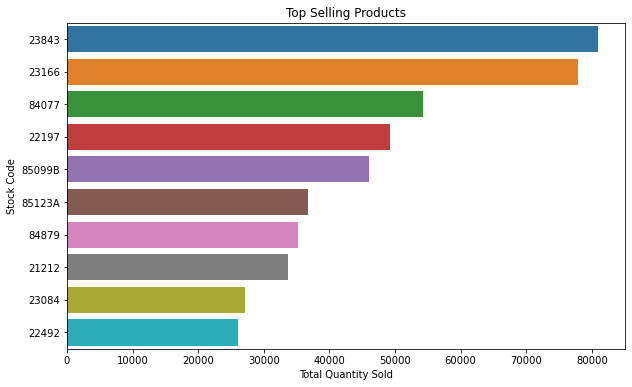

In [26]:
# Top-selling products
top_products = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Stock Code')
plt.show()

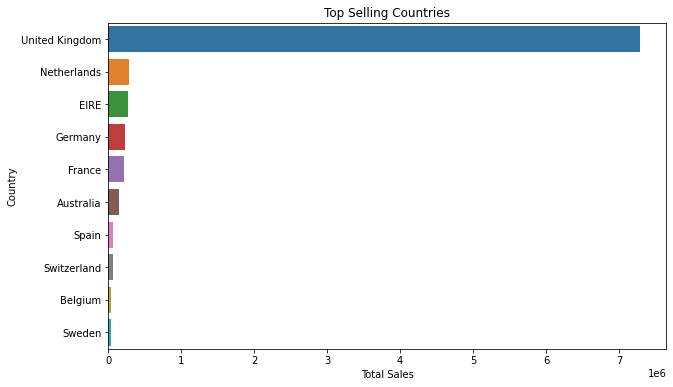

In [27]:
# Top-selling countries
top_countries = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top Selling Countries')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()

# Outliers Identification
Identify Outliers: Use box plots to identify outliers in the Quantity and TotalPrice.


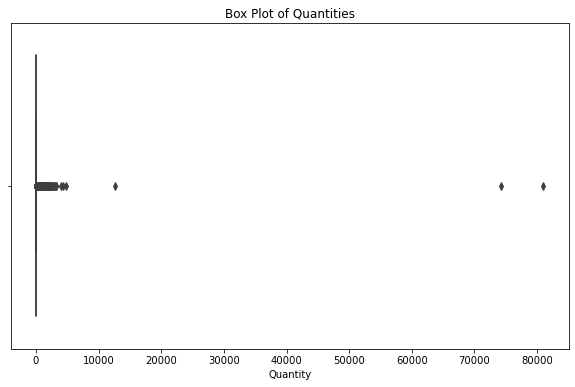

In [28]:
# Box plot for quantities
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Quantity'])
plt.title('Box Plot of Quantities')
plt.xlabel('Quantity')
plt.show()

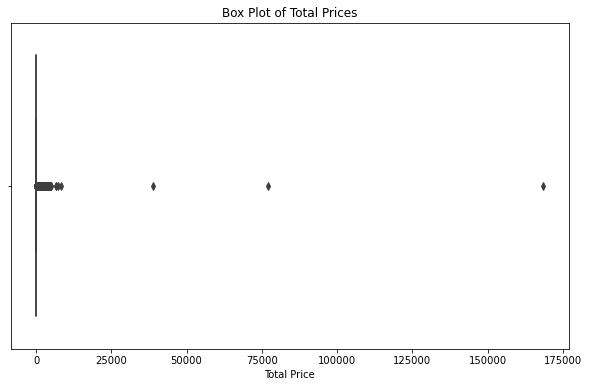

In [29]:
# Box plot for total prices
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['TotalPrice'])
plt.title('Box Plot of Total Prices')
plt.xlabel('Total Price')
plt.show()

# Conclusion

### Key Findings:
1. **Sales Trends**:
   - The busiest sales months are [list of months].
   - The busiest days of the week are [list of days].

2. **Top-Selling Products and Countries**:
   - The top-selling products are [list of products].
   - The top-selling countries are [list of countries].

3. **Outliers**:
   - Identified outliers in the quantities and total prices which may indicate bulk purchases or data entry errors.

### Recommendations:
- Focus marketing efforts during peak sales months to maximize revenue.
- Ensure sufficient stock for top-selling products to meet demand.
- Develop targeted marketing campaigns for top-performing countries.
- Investigate outliers to understand their nature and impact on the business.
